<h1><center> Python Programming for New Data Scientists </center><h1/>
<h3><center> "PANDAS" </center><h3/>
<h3><center> "Boyd BigData RPG - CITE Symposium on Big Data and Machine Learning" </center><h3/>

## Data structures
- Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call pd.Series([1,3,5,np.nan,6,8])
- DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It stems from the R data.frame() object.

## 6.1 Create Dataframe
- Defind columns
- Create list of Data; one list represent one row
- Forming to Dataframe by pandas package

In [0]:
import pandas as pd

### 6.1.1 Create DF From List

In [0]:
columns = ['name', 'age', 'gender', 'job']

In [0]:
user1 = boyd.DataFrame([['alice', 19, "F", "student"],
                      ['john', 26, "M", "student"]], columns=columns)

NameError: ignored

In [0]:
user1

name  age gender      job
0  alice   19      F  student
1   john   26      M  student

In [0]:
user2 = pd.DataFrame([['eric', 22, "M", "student"],
                      ['paul', 58, "F", "manager"]],columns=columns)

In [0]:
user2

name  age gender      job
0  eric   22      M  student
1  paul   58      F  manager

### 6.1.2 Create DF From Dict
- Defind; key=[value1,value2,...,valueN]
- each key represent to each column
- Forming to Dataframe by pandas package

In [0]:
user3 = pd.DataFrame(dict(name=['peter', 'julie'],
                          age=[33, 44], 
                          gender=['M', 'F'],
                          job=['engineer', 'scientist']))

In [0]:
{
    "name":["peter","julie"],
    
}

{'name': ['peter', 'julie']}

In [0]:
user3

age gender        job   name
0   33      M   engineer  peter
1   44      F  scientist  julie

## 6.2 Combining DataFrames
### 6.2.1 Concatenate DataFrame

In [0]:
user_concat = user1.append(user2)
user_concat

name  age gender      job
0  alice   19      F  student
1   john   26      M  student
0   eric   22      M  student
1   paul   58      F  manager

In [0]:
user_concat.reset_index().drop(columns="index")

name  age gender      job
0  alice   19      F  student
1   john   26      M  student
2   eric   22      M  student
3   paul   58      F  manager

In [0]:
users = pd.concat([user1, user2, user3],axis=0)

In [0]:
users.reset_index().reset_index()

level_0  index  age gender        job   name
0        0      0   19      F    student  alice
1        1      1   26      M    student   john
2        2      0   22      M    student   eric
3        3      1   58      F    manager   paul
4        4      0   33      M   engineer  peter
5        5      1   44      F  scientist  julie

In [0]:
users = users.drop(columns=["level_0", "index"])

### 6.2.2 Join DataFrame

In [0]:
user4 = pd.DataFrame(dict(name=['alice', 'john', 'eric', 'julie'],
                          height=[165, 180, 175, 171]))

In [0]:
user4

height   name
0     165  alice
1     180   john
2     175   eric
3     171  julie

In [0]:
user4 = user4.set_index("name")

In [0]:
user4

height
name         
alice     165
john      180
eric      175
julie     171

In [0]:
user1

name  age gender      job
0  alice   19      F  student
1   john   26      M  student

### 6.2.3 Use intersection of keys from both frames

In [0]:
merge_inter = pd.merge(user1, user4, on="name") 
merge_inter

name  age gender      job  height
0  alice   19      F  student     165
1   john   26      M  student     180

In [0]:
user1

name  age gender      job
0  alice   19      F  student
1   john   26      M  student

In [0]:
user4 = user4.reset_index()
user4

name  height
0  alice     165
1   john     180
2   eric     175
3  julie     171

In [0]:
user1["name"], user4["name"]

(0    alice
 1     john
 Name: name, dtype: object, 0    alice
 1     john
 2     eric
 3    julie
 Name: name, dtype: object)

In [0]:
merge_inter

name  age gender      job  height
0  alice   19      F  student     165
1   john   26      M  student     180

### 6.2.4 Use union of keys from both frames

In [0]:
users_outer = pd.merge(user1, user4, on="name", how='outer')

In [0]:
users_outer

name   age gender      job  height
0  alice  19.0      F  student     165
1   john  26.0      M  student     180
2   eric   NaN    NaN      NaN     175
3  julie   NaN    NaN      NaN     171

In [0]:
users_outer.describe()

age      height
count   2.000000    4.000000
mean   22.500000  172.750000
std     4.949747    6.344289
min    19.000000  165.000000
25%    20.750000  169.500000
50%    22.500000  173.000000
75%    24.250000  176.250000
max    26.000000  180.000000

In [0]:
users_outer.loc[:,"age"] = \
  users_outer.loc[:,"age"].fillna(22.5)

In [0]:
users_outer.loc[:,"age"] = \
  users_outer.loc[:,"age"] \
.fillna(users_outer["age"].mean())

In [0]:
users_outer

name   age gender      job  height
0  alice  19.0      F  student     165
1   john  26.0      M  student     180
2   eric  22.5    NaN      NaN     175
3  julie  22.5    NaN      NaN     171

In [0]:
user1

name  age gender      job
0  alice   19      F  student
1   john   26      M  student

### 6.2.5 Reshaping by pivoting
- like the the Pivoting, “Unpivots” is a DataFrame from wide format to long (stacked) format,

In [0]:
users = users.reset_index() \
  .drop(columns="index")

In [0]:
users

age gender        job   name
0   19      F    student  alice
1   26      M    student   john
2   22      M    student   eric
3   58      F    manager   paul
4   33      M   engineer  peter
5   44      F  scientist  julie

In [0]:
staked = pd.melt(users, 
                 id_vars="name", 
                 var_name="variable", 
                 value_name="value")

In [0]:
staked

name variable      value
0   alice      age         19
1    john      age         26
2    eric      age         22
3    paul      age         58
4   peter      age         33
5   julie      age         44
6   alice   gender          F
7    john   gender          M
8    eric   gender          M
9    paul   gender          F
10  peter   gender          M
11  julie   gender          F
12  alice      job    student
13   john      job    student
14   eric      job    student
15   paul      job    manager
16  peter      job   engineer
17  julie      job  scientist

- “pivots” a DataFrame from long (stacked) format to wide format,

In [0]:
staked.pivot(index='name', 
             columns='variable', 
             values='value')

variable age gender        job
name                          
alice     19      F    student
eric      22      M    student
john      26      M    student
julie     44      F  scientist
paul      58      F    manager
peter     33      M   engineer

## 6.3 Summarizing

In [0]:
# examine the users data
users

age gender        job   name
0   19      F    student  alice
1   26      M    student   john
0   22      M    student   eric
1   58      F    manager   paul
0   33      M   engineer  peter
1   44      F  scientist  julie

In [0]:
# DataFrame
type(users)

pandas.core.frame.DataFrame

In [0]:
# print the first 5 rows
users.head()

age gender       job   name
0   19      F   student  alice
1   26      M   student   john
2   22      M   student   eric
3   58      F   manager   paul
4   33      M  engineer  peter

In [0]:
# print the last 5 rows
users.tail()

age gender        job   name
1   26      M    student   john
0   22      M    student   eric
1   58      F    manager   paul
0   33      M   engineer  peter
1   44      F  scientist  julie

In [0]:
# "the index"
users.index

RangeIndex(start=0, stop=6, step=1)

In [0]:
# column names (which is "an index")
users.columns

Index(['age', 'gender', 'job', 'name'], dtype='object')

In [0]:
# data types of each column
users.dtypes

age        int64
gender    object
job       object
name      object
dtype: object

In [0]:
# number of rows and columns
users.shape

(6, 4)

In [0]:
# underlying numpy array
users.values

array([[19, 'F', 'student', 'alice'],
       [26, 'M', 'student', 'john'],
       [22, 'M', 'student', 'eric'],
       [58, 'F', 'manager', 'paul'],
       [33, 'M', 'engineer', 'peter'],
       [44, 'F', 'scientist', 'julie']], dtype=object)

In [0]:
# concise summary (includes memory usage as of pandas 0.15.0)
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 1
Data columns (total 4 columns):
age       6 non-null int64
gender    6 non-null object
job       6 non-null object
name      6 non-null object
dtypes: int64(1), object(3)
memory usage: 240.0+ bytes


## 6.4 Columns selection

In [0]:
# select one column
users['gender']

0    F
1    M
0    M
1    F
0    M
1    F
Name: gender, dtype: object

In [0]:
# Series
type(users['gender'])

pandas.core.series.Series

In [0]:
# select one column using the DataFrame
users.gender

0    F
1    M
0    M
1    F
0    M
1    F
Name: gender, dtype: object

- select multiple columns

In [0]:
# select two columns
users[['age', 'gender']]

age gender
0   19      F
1   26      M
0   22      M
1   58      F
0   33      M
1   44      F

In [0]:
# create a list
my_cols = ['age', 'gender']

In [0]:
users[my_cols]

age gender
0   19      F
1   26      M
0   22      M
1   58      F
0   33      M
1   44      F

In [0]:
# DataFrame
type(users[my_cols])

pandas.core.frame.DataFrame

## 6.5 Rows selection (basic)
- iloc is strictly integer position based

In [0]:
df = users.copy()

In [0]:
df

age gender        job   name
0   19      F    student  alice
1   26      M    student   john
0   22      M    student   eric
1   58      F    manager   paul
0   33      M   engineer  peter
1   44      F  scientist  julie

In [0]:
# first row
df.iloc[0]

age            19
gender          F
job       student
name        alice
Name: 0, dtype: object

In [0]:
df.iloc[1:5,1:3]

gender       job
1      M   student
0      M   student
1      F   manager
0      M  engineer

In [0]:
# first item of first row
df.iloc[0, 0]

19

In [0]:
df.iloc[0, 0] = 55

In [0]:
df.iloc[0, 0]

55

In [0]:
# setting a copy, and not the original frame data.
for i in range(users.shape[0]):
    row = df.iloc[i]
    row.age *= 100

/Users/redthegx/anaconda3/envs/tf-thesis/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
print(range(users.shape[0]))
print(list(range(users.shape[0])))

range(0, 6)
[0, 1, 2, 3, 4, 5]


In [0]:
df

age gender        job   name
0   55      F    student  alice
1   26      M    student   john
0   22      M    student   eric
1   58      F    manager   paul
0   33      M   engineer  peter
1   44      F  scientist  julie

- ix supports mixed integer and label based access.

In [0]:
df2 = users.copy()

In [0]:
df2

age gender        job   name
0   19      F    student  alice
1   26      M    student   john
0   22      M    student   eric
1   58      F    manager   paul
0   33      M   engineer  peter
1   44      F  scientist  julie

In [0]:
df2.ix[0]  # first row

/Users/redthegx/anaconda3/envs/tf-thesis/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


age gender       job   name
0   19      F   student  alice
0   22      M   student   eric
0   33      M  engineer  peter

In [0]:
df2.ix[0, "age"] # first item of first row

/Users/redthegx/anaconda3/envs/tf-thesis/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0    19
0    22
0    33
Name: age, dtype: int64

In [0]:
df2.ix[0, "age"] = 55

/Users/redthegx/anaconda3/envs/tf-thesis/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [0]:
df2.ix[0]

/Users/redthegx/anaconda3/envs/tf-thesis/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


age gender       job   name
0   55      F   student  alice
0   55      M   student   eric
0   55      M  engineer  peter

In [0]:
# Checking range and order number via list
print(range(df2.shape[0]))
print(list(range(df2.shape[0])))

range(0, 6)
[0, 1, 2, 3, 4, 5]


In [0]:
# Resetindex by drop and create new one
df2.reset_index(drop = True, inplace = True)

In [0]:
df2

age gender        job   name
0   55      F    student  alice
1   26      M    student   john
2   55      M    student   eric
3   58      F    manager   paul
4   55      M   engineer  peter
5   44      F  scientist  julie

In [0]:
for i in range(df2.shape[0]):
    df2.ix[i, "age"] *= 10

/Users/redthegx/anaconda3/envs/tf-thesis/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [0]:
df2

age gender        job   name
0  550      F    student  alice
1  260      M    student   john
2  550      M    student   eric
3  580      F    manager   paul
4  550      M   engineer  peter
5  440      F  scientist  julie

## 6.6 Rows selection (filtering)
- simple logical filtering

In [0]:
# only show users with age < 20
users[users.age < 20]

age gender      job   name
0   19      F  student  alice

In [0]:
# or, create a Series of booleans
young_bool = users.age < 20
young_bool

0     True
1    False
0    False
1    False
0    False
1    False
Name: age, dtype: bool

In [0]:
# Use that Series to filter rows
young = users[young_bool]

In [0]:
young

age gender      job   name
0   19      F  student  alice

In [0]:
users[users.age < 20].job # select one column from the filtered results

0    student
Name: job, dtype: object

- Advanced logical filtering

In [0]:
# select multiple columns
users[users.age < 20][['age', 'job']]

age      job
0   19  student

In [0]:
# use multiple conditions
users[(users.age > 20) | (users.gender == 'M')]

age gender        job   name
1   26      M    student   john
0   22      M    student   eric
1   58      F    manager   paul
0   33      M   engineer  peter
1   44      F  scientist  julie

In [0]:
# filter specific values
users[users.job.isin(['student', 'engineer'])]

age gender       job   name
0   19      F   student  alice
1   26      M   student   john
0   22      M   student   eric
0   33      M  engineer  peter

## 6.7 Sorting

In [0]:
df3 = users.copy()

In [0]:
df3

age gender        job   name
0   19      F    student  alice
1   26      M    student   john
0   22      M    student   eric
1   58      F    manager   paul
0   33      M   engineer  peter
1   44      F  scientist  julie

In [0]:
df3.age.sort_values() # only works for a Series

0    19
0    22
1    26
0    33
1    44
1    58
Name: age, dtype: int64

In [0]:
df3.sort_values(by='age') # sort rows by a specific column

age gender        job   name
0   19      F    student  alice
0   22      M    student   eric
1   26      M    student   john
0   33      M   engineer  peter
1   44      F  scientist  julie
1   58      F    manager   paul

In [0]:
df3.sort_values(by='age', ascending=False) # use descending order instead

age gender        job   name
1   58      F    manager   paul
1   44      F  scientist  julie
0   33      M   engineer  peter
1   26      M    student   john
0   22      M    student   eric
0   19      F    student  alice

In [0]:
df3.sort_values(by=['job', 'age']) # sort by multiple columns

age gender        job   name
0   33      M   engineer  peter
1   58      F    manager   paul
1   44      F  scientist  julie
0   19      F    student  alice
0   22      M    student   eric
1   26      M    student   john

In [0]:
df3.sort_values(by=['job', 'age'], inplace=True) # modify df

In [0]:
df3

age gender        job   name
0   33      M   engineer  peter
1   58      F    manager   paul
1   44      F  scientist  julie
0   19      F    student  alice
0   22      M    student   eric
1   26      M    student   john

## 6.8 Descriptive statistics

- Summarize all numeric columns


In [0]:
users_outer.describe()

age      height
count   6.000000    4.000000
mean   33.666667  172.750000
std    14.895189    6.344289
min    19.000000  165.000000
25%    23.000000  169.500000
50%    29.500000  173.000000
75%    41.250000  176.250000
max    58.000000  180.000000

In [0]:
df3.describe()

age
count   6.000000
mean   33.666667
std    14.895189
min    19.000000
25%    23.000000
50%    29.500000
75%    41.250000
max    58.000000

- Summarize all columns

In [0]:
df3.describe(include='all')

age gender      job  name
count    6.000000      6        6     6
unique        NaN      2        4     6
top           NaN      F  student  john
freq          NaN      3        3     1
mean    33.666667    NaN      NaN   NaN
std     14.895189    NaN      NaN   NaN
min     19.000000    NaN      NaN   NaN
25%     23.000000    NaN      NaN   NaN
50%     29.500000    NaN      NaN   NaN
75%     41.250000    NaN      NaN   NaN
max     58.000000    NaN      NaN   NaN

In [0]:
df.describe(include=['object']) # limit to one (or more) types

gender      job  name
count       6        6     6
unique      2        4     6
top         F  student  john
freq        3        3     1

- Statistics per group (groupby)


In [0]:
df.groupby("job").mean()

age
job                 
engineer   33.000000
manager    58.000000
scientist  44.000000
student    34.333333

In [0]:
df.groupby("job")["age"].mean()

job
engineer     33.000000
manager      58.000000
scientist    44.000000
student      34.333333
Name: age, dtype: float64

In [0]:
df.groupby("job").describe(include='all')

age                                                                \
          count unique top freq       mean        std   min   25%   50%   75%   
job                                                                             
engineer    1.0    NaN NaN  NaN  33.000000        NaN  33.0  33.0  33.0  33.0   
manager     1.0    NaN NaN  NaN  58.000000        NaN  58.0  58.0  58.0  58.0   
scientist   1.0    NaN NaN  NaN  44.000000        NaN  44.0  44.0  44.0  44.0   
student     3.0    NaN NaN  NaN  34.333333  18.009257  22.0  24.0  26.0  40.5   

          ...    name                                                 
          ...  unique    top freq mean  std  min  25%  50%  75%  max  
job       ...                                                         
engineer  ...       1  peter    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
manager   ...       1   paul    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
scientist ...       1  julie    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
student   ...       3   john    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[4 rows x 33 columns]

## 6.9 Quality check

### 6.9.1 Remove duplicate data

In [0]:
df_append = users.append(df.iloc[0], ignore_index=True)

In [0]:
df_append

age gender        job   name
0   19      F    student  alice
1   26      M    student   john
2   22      M    student   eric
3   58      F    manager   paul
4   33      M   engineer  peter
5   44      F  scientist  julie
6   55      F    student  alice

In [0]:
# (True if a row is identical to a previous row)
df_append.duplicated() # Series of booleans

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [0]:
df_append.duplicated().sum() # Count of duplicate

0

In [0]:
df_append[df_append.duplicated()] # Only show duplicate

Empty DataFrame
Columns: [age, gender, job, name]
Index: []

In [0]:
df_append.age.duplicated() # Check single column for duplicate

0    False
1    False
2    False
3    False
4    False
5    False
6    False
Name: age, dtype: bool

In [0]:
# specify columns for finding duplicates
df_append.duplicated(['age', 'gender']).sum() 

0

In [0]:
# Drop duplicate row
df_append = df_append.drop_duplicates() 

In [0]:
df_append

age gender        job   name
0   19      F    student  alice
1   26      M    student   john
2   22      M    student   eric
3   58      F    manager   paul
4   33      M   engineer  peter
5   44      F  scientist  julie
6   55      F    student  alice

### 6.9.2 Missing data

In [0]:
# Missing values are often just excluded
df_missing = users_outer.copy()

In [0]:
df_missing

age gender        job   name  height
0   19      F    student  alice   165.0
1   26      M    student   john   180.0
2   22      M    student   eric   175.0
3   58      F    manager   paul     NaN
4   33      M   engineer  peter     NaN
5   44      F  scientist  julie   171.0

In [0]:
df_missing.describe(include='all') # excludes missing values

age gender      job  name      height
count    6.000000      6        6     6    4.000000
unique        NaN      2        4     6         NaN
top           NaN      F  student  john         NaN
freq          NaN      3        3     1         NaN
mean    33.666667    NaN      NaN   NaN  172.750000
std     14.895189    NaN      NaN   NaN    6.344289
min     19.000000    NaN      NaN   NaN  165.000000
25%     23.000000    NaN      NaN   NaN  169.500000
50%     29.500000    NaN      NaN   NaN  173.000000
75%     41.250000    NaN      NaN   NaN  176.250000
max     58.000000    NaN      NaN   NaN  180.000000

- Find missing values in a Series

In [0]:
df_missing.height.isnull() # True if NaN, False otherwise

0    False
1    False
2    False
3     True
4     True
5    False
Name: height, dtype: bool

In [0]:
df_missing.height.notnull() # False if NaN, True otherwise

0     True
1     True
2     True
3    False
4    False
5     True
Name: height, dtype: bool

In [0]:
df_missing[df_missing.height.notnull()] # only show rows where age is not NaN

age gender        job   name  height
0   19      F    student  alice   165.0
1   26      M    student   john   180.0
2   22      M    student   eric   175.0
5   44      F  scientist  julie   171.0

In [0]:
df_missing.height.isnull().sum() # Count the missing values

2

In [0]:
# find missing values in a DataFrame
df_missing.isnull() # DataFrame of booleans 

age  gender    job   name  height
0  False   False  False  False   False
1  False   False  False  False   False
2  False   False  False  False   False
3  False   False  False  False    True
4  False   False  False  False    True
5  False   False  False  False   False

In [0]:
df_missing.isnull().sum() # calculate the sum of each column

age       0
gender    0
job       0
name      0
height    2
dtype: int64

- Strategy 1: drop missing values

In [0]:
df_missing.dropna() # drop a row if ANY values are missing

age gender        job   name  height
0   19      F    student  alice   165.0
1   26      M    student   john   180.0
2   22      M    student   eric   175.0
5   44      F  scientist  julie   171.0

In [0]:
df_missing.dropna(how='all') # drop a row only if ALL values are missing

age gender        job   name  height
0   19      F    student  alice   165.0
1   26      M    student   john   180.0
2   22      M    student   eric   175.0
3   58      F    manager   paul     NaN
4   33      M   engineer  peter     NaN
5   44      F  scientist  julie   171.0

- Strategy 2: fill in missing values

In [0]:
df_missing.height.mean()

172.75

In [0]:
df_missing2 = df_missing.copy()

In [0]:
df_missing2.ix[df_missing2.height.isnull(), "height"] = df_missing2["height"].mean()

/Users/redthegx/anaconda3/envs/tf-thesis/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [0]:
df_missing2

age gender        job   name  height
0   19      F    student  alice  165.00
1   26      M    student   john  180.00
2   22      M    student   eric  175.00
3   58      F    manager   paul  172.75
4   33      M   engineer  peter  172.75
5   44      F  scientist  julie  171.00

## 6.10 Rename values

In [0]:
users_outer

name   age gender      job  height
0  alice  19.0      F  student     165
1   john  26.0      M  student     180
2   eric  22.5    NaN      NaN     175
3  julie  22.5    NaN      NaN     171

In [0]:
df_rename = users_outer.copy()

In [0]:
df_rename

name   age gender      job  height
0  alice  19.0      F  student     165
1   john  26.0      M  student     180
2   eric  22.5    NaN      NaN     175
3  julie  22.5    NaN      NaN     171

In [0]:
df_rename.columns

Index(['age', 'gender', 'job', 'name', 'height'], dtype='object')

### 6.10.1 Rename only specific value

In [0]:
df_rename.loc[df_rename["job"] == 'student', 'job']

0    student
1    student
Name: job, dtype: object

In [0]:
df_rename

name   age gender  job  height
0  alice  19.0      F   PM     165
1   john  26.0      M   PM     180
2   eric  22.5    NaN  NaN     175
3  julie  22.5    NaN  NaN     171

### 6.10.2 Rename all values in column

In [0]:
df_rename.job = df_rename.job.map({ 
    'student':'etudiant',  
    'manager':'manager',
    'engineer':'ingenieur', 
    'scientist':'scientific'
})

In [0]:
df_rename

age gender        job   name  height
0   19      F         PM  alice   165.0
1   26      M         PM   john   180.0
2   22      M         PM   eric   175.0
3   58      F    manager   paul     NaN
4   33      M   engineer  peter     NaN
5   44      F  scientist  julie   171.0

### 6.10.3 Rename Column Name

In [0]:
df_rename.rename(columns={'name':'nickname'})

age gender         job nickname  height
0   19      F    etudiant    alice   165.0
1   26      M    etudiant     john   180.0
2   22      M    etudiant     eric   175.0
3   58      F     manager     paul     NaN
4   33      M   ingenieur    peter     NaN
5   44      F  scientific    julie   171.0

## 6.11 Dealing with outliers

In [0]:
import numpy as np

In [0]:
size = pd.Series(np.random.normal(loc=175, size=20, scale=10)) # Corrupt the first 3 measures

In [0]:
size

0     172.623385
1     161.916902
2     176.119346
3     180.227986
4     166.534371
5     182.608393
6     173.447723
7     173.567635
8     162.849754
9     163.952510
10    170.034501
11    197.278816
12    181.610051
13    155.756486
14    183.499769
15    173.263450
16    183.179421
17    186.556465
18    166.546672
19    170.439555
dtype: float64

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/redthegx/anaconda3/envs/tf-thesis/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


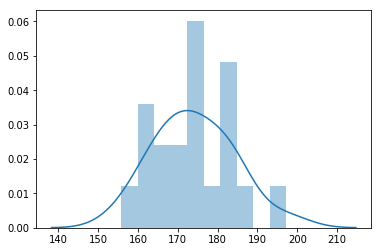

In [0]:
sns.distplot(size, bins=10)

In [0]:
size[:3] += 500

In [0]:
size

0     672.623385
1     661.916902
2     676.119346
3     180.227986
4     166.534371
5     182.608393
6     173.447723
7     173.567635
8     162.849754
9     163.952510
10    170.034501
11    197.278816
12    181.610051
13    155.756486
14    183.499769
15    173.263450
16    183.179421
17    186.556465
18    166.546672
19    170.439555
dtype: float64

/Users/redthegx/anaconda3/envs/tf-thesis/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


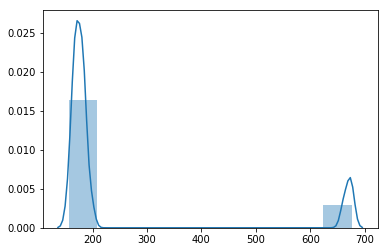

In [0]:
sns.distplot(size, bins=10)

### 6.11.1 Based on parametric statistics: use the mean

Assume random variable follows the normal distribution Exclude data outside 3 standard-deviations: - Probability that a sample lies within 1 sd: 68.27% - Probability that a sample lies within 3 sd: 99.73% (68.27 + 2 * 15.73)

In [0]:
size_outlr_mean = size.copy()

In [0]:
size_outlr_mean[:4]

0    672.623385
1    661.916902
2    676.119346
3    180.227986
dtype: float64

In [0]:
size_outlr_mean.mean()

249.10065958830464

In [0]:
size_outlr_mean[((size - size.mean()).abs() > 3 * size.std())]

Series([], dtype: float64)

In [0]:
(size - size.mean()).abs()

0     423.522725
1     412.816242
2     427.018686
3      68.872673
4      82.566289
5      66.492266
6      75.652937
7      75.533025
8      86.250905
9      85.148149
10     79.066159
11     51.821844
12     67.490609
13     93.344173
14     65.600891
15     75.837210
16     65.921239
17     62.544194
18     82.553987
19     78.661105
dtype: float64

In [0]:
3 * size.std()

545.3044513878796

In [0]:
size_outlr_mean[((size - size.mean()).abs() > 3 * size.std())] = size.mean()

In [0]:
size_outlr_mean.mean(), size_outlr_mean.median()

(249.10065958830464, 176.89781075262263)

/Users/redthegx/anaconda3/envs/tf-thesis/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


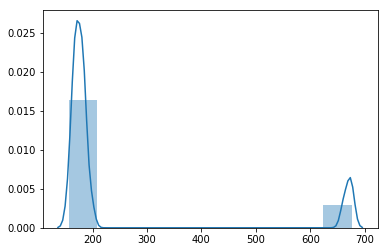

In [0]:
sns.distplot(size_outlr_mean, bins=10)

### 6.11.2 Based on non-parametric statistics: use the median

In [0]:
mad = 1.4826 * np.median(np.abs(size - size.median()))

In [0]:
mad

14.556314727523304

In [0]:
size_outlr_mad = size.copy()

In [0]:
size_outlr_mad[:4]

0    672.623385
1    661.916902
2    676.119346
3    180.227986
dtype: float64

In [0]:
(size - size.median()).abs()

0     495.725574
1     485.019091
2     499.221535
3       3.330176
4      10.363440
5       5.710583
6       3.450088
7       3.330176
8      14.048056
9      12.945300
10      6.863310
11     20.381005
12      4.712240
13     21.141324
14      6.601958
15      3.634361
16      6.281610
17      9.658654
18     10.351138
19      6.458256
dtype: float64

In [0]:
3 * mad

43.668944182569916

In [0]:
size_outlr_mad[((size - size.median()).abs() > 3 * mad)]

0    672.623385
1    661.916902
2    676.119346
dtype: float64

In [0]:
size_outlr_mad[((size - size.median()).abs() > 3 * mad)] = size.median()

In [0]:
size_outlr_mad.mean(), size_outlr_mad.median()

(174.88661125574504, 176.31820843265334)